# Problem Set 3, due February 5 at 5:30 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


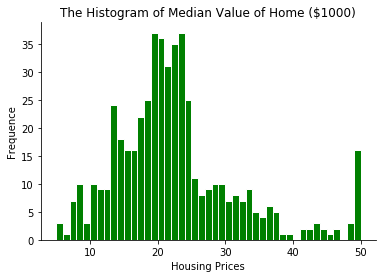

In [4]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()
bins=range(int(min(bdata.target)),int(max(bdata.target)+1), 1)
ax.hist(bdata.target,bins,color=['green'],edgecolor = 'white')
plt.ylabel('Frequence') # add labels 
plt.xlabel('Housing Prices')
plt.title('The Histogram of Median Value of Home ($1000)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


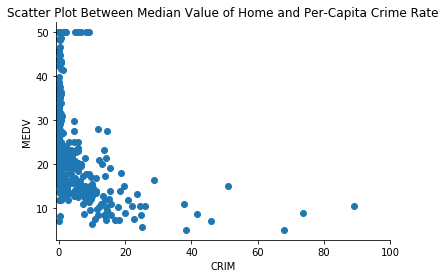

In [5]:
# enter your code below
fig, ax=plt.subplots()
ax.scatter(bdata.data[:,0],bdata.target)
plt.xlim(-1,100)
plt.title('Scatter Plot Between Median Value of Home and Per-Capita Crime Rate')
plt.xlabel("CRIM")
plt.ylabel("MEDV")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

C:\Users\Jessica\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Fitting with B
[ 34.55384088  -0.95004935]


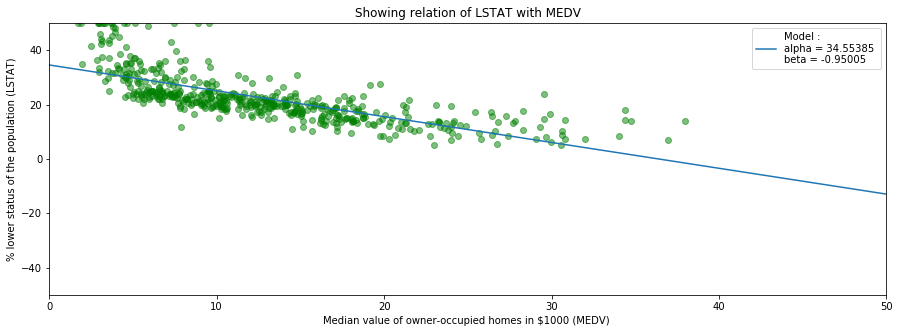

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
data = np.column_stack((bdata.data,bdata.target))
fit1 = smf.OLS(data[:,-1], sm.add_constant(data[:,-2])).fit()
print("Fitting with B")
print (fit1.params)
x1 = np.array(range(0,400))
y1 = fit1.params[0] + fit1.params[1]*x1
plt.figure(figsize = (15,5))
scat = plt.scatter(data[:,-2], data[:,-1], color = 'g', alpha = 0.5)
plt.xlim([0,50])
plt.ylim([-50,50])
model1, = plt.plot(x1, y1, linewidth = 1.5)
plt.legend([model1,], ["Model : \nalpha = 34.55385 \nbeta = -0.95005"])
plt.xlabel('Median value of owner-occupied homes in $1000 (MEDV) ')
plt.ylabel('% lower status of the population (LSTAT)')
plt.title('Showing relation of LSTAT with MEDV')
plt.show()

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [7]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
from math import sqrt
def compute_rmse(predictions, yvalues):
    rmse = 0
    for (i,j) in zip(predictions,yvalues):
            rmse += pow((i-j),2)
    rmse=sqrt(rmse/len(predictions))
    return round(rmse,2)
   

In [8]:
compute_rmse((2,2,3),(0,2,6))

2.08

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [9]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
import random
np.random.seed(seed=13579)
boston_df= pd.DataFrame(bdata.data, columns = bdata.feature_names)
boston_df['TARGET']= bdata.target
# divide data into traindata and test
boston_df['RAND'] = boston_df.apply(lambda row: np.random.random(), axis = 1)
bdata_train = boston_df[boston_df['RAND'] > 0.34]
bdata_test = boston_df[boston_df['RAND'] <= 0.34]

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [10]:
def  average_predict(data):
    predict_1=sum(data)/len(data)
    predict=np.ones((len(data),1))*predict_1
    return predict 
train_rmse=compute_rmse(average_predict(bdata_train['TARGET']),bdata_train['TARGET'])
test_rmse=compute_rmse(average_predict(bdata_test['TARGET']),bdata_test['TARGET'])
print("Train Data RMSE is "+ str(train_rmse))
print("Train Data RMSE is "+ str(test_rmse))

Train Data RMSE is 9.87
Train Data RMSE is 7.75


The RMSE for the train data set is higher than that for the test data set, which is not expected. This may be caused by the relatively lower variance within test data itself. 

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [11]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""

def distance(x1, x2, L):
    dist=0
    for (i,j) in zip(x1,x2):
        dist+=(abs(i-j)**L)
    dist=dist**(1/L)
    return dist

In [12]:
distance((3,4),(6,8),2)

5.0

###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [13]:
"""
Function
--------
nneighbor

Given four dataset (testx, testu,trainx, trainy ), calculate the nearest neighbor based on testx, trainx and return the RMSE value
for the predicted yvalues and actual values.

Parameters
----------
trainx : array
    Array of numerical values corresponding to feature values for each of the observations in the training set 

trainy : array
    Array of numerical values corresponding to the actual target values for each of the observations in the training set 

testx : array
    Array of numerical values corresponding to feature values for each of the observations in the testing set 

testy : array
    Array of numerical values corresponding to the actual target values for each of the observations in the testing set 
    
L: int
    Value of L to use in computing distances

Returns
-------
rmse: int
     Root Mean Squared Error of prediction using the nearest neighbor.
"""
trainx=bdata_train[['CRIM', 'RM']].values
trainy=bdata_train['TARGET'].values
testx=bdata_test[['CRIM', 'RM']].values
testy=bdata_test['TARGET'].values
L=2
import time
def nneighbor(trainx, trainy,testx,testy,L):
    start_time = time.time()
    predictions=[]
    for x_test in testx:
        distset={}
        for x_train, y_train in zip(trainx,trainy):
            distset[y_train]=distance(x_train,x_test,L)
        prediction=min(distset, key=distset.get)
        predictions.append(prediction)
    rmse = compute_rmse(predictions, testy)
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
         )
    print("rmse: " + str(round(rmse,2)))
    return rmse
#     return rmse
nneighbor(trainx,trainy,testx,testy,L)

Time taken: 0.37 seconds
rmse: 6.95


6.95

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [14]:
"""
Function
--------
normalize

Given two arrays, return the normalized array of the first array based on the SD value and mean value of  the second array. 

Parameters
----------
raw_data : array
    an array needs to be normalized
norm: array
    an array to calculate its SD and mean for the use of the first array
    
Returns
-------
data : array
    normalized array
"""
# define the normalize function 
def normalize(raw_data,norm):
    normalized_data=[]
    SD=np.std(norm, axis=0)
    mean=np.mean(norm,axis=0)
    for i in raw_data:
        normal_data=(i-mean)/SD
        normalized_data.append(normal_data)
    return normalized_data
# For the convenience of future calculation, define the normalize_neighbor to calculate the RMSE for normalized data.  
"""
Function
--------
normalize_neighbor

Given four arrays, x_train,y_train,x_test,y_test, normalize the data and then compute the root mean squared error of prediction using the nearest neighbor.

Parameters
----------
x_train : array
    Numerical values corresponding to feature values in the training set 

y_train : array
    Numerical values corresponding to the actual target values in the training set 

x_test : array
    Numerical values corresponding to feature values in the testing set 

y_test : array
    Numerical values corresponding to the actual target values in the testing set 
    
L: int
    Value of L to use in computing distances

Returns
-------
rmse: int
     Root Mean Squared Error of prediction using the nearest neighbor.
"""
def normalize_neighbor(x_train, y_train, x_test, y_test, L):
    x_train_normalized = normalize(x_train,x_train)
    x_test_normalized = normalize(x_test,x_train)
    y_train_normalized = y_train
    y_test_normalized = y_test
    return nneighbor(x_train_normalized, y_train_normalized, 
                     x_test_normalized, y_test_normalized, L)

normalize_neighbor(trainx, trainy, testx, testy, 2)

Time taken: 0.33 seconds
rmse: 7.43


7.43

I used train data to compute the mean and standard deviation on the training data and use these values to normalize the test dataset. 
From the output, I found the RMSE of the normalized dataset is higher than that in the original data set. 

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [15]:
# enter your code here

def optimal_nneighbor(bdata_train, bdata_test, features, L):
    x_train = bdata_train[features].values
    y_train = bdata_train['TARGET'].values
    x_test = bdata_test[features].values
    y_test = bdata_test['TARGET'].values
    rmse = normalize_neighbor(x_train, y_train, x_test, y_test, L)
    print("Features: " + str(features) + ", L = " + str(L) + "\n"+", rmse="+str(rmse))
    return rmse

features = ['CRIM', 'RM']
L = 2
optimal_nneighbor(bdata_train, bdata_test, features, L)

features = ['CRIM', 'RM']
L = 4
optimal_nneighbor(bdata_train, bdata_test, features, L)

features = ['CRIM', 'RM', 'LSTAT']
L = 2
optimal_nneighbor(bdata_train, bdata_test, features, L)

features = ['CRIM', 'RM', 'LSTAT']
L = 4
optimal_nneighbor(bdata_train, bdata_test, features, L)

features = ['CRIM', 'RM', 'LSTAT', 'B']
L = 2
optimal_nneighbor(bdata_train, bdata_test, features, L)

features = ['CRIM', 'RM', 'LSTAT', 'B']
L = 4
optimal_nneighbor(bdata_train, bdata_test, features, L)

L = 2
features = ['CRIM', 'RM', 'LSTAT', 'B','LSTAT']
optimal_nneighbor(bdata_train, bdata_test, features, L)

L = 4
features = ['CRIM', 'RM', 'LSTAT', 'B','LSTAT']
optimal_nneighbor(bdata_train, bdata_test, features, L)

Time taken: 0.33 seconds
rmse: 7.43
Features: ['CRIM', 'RM'], L = 2
, rmse=7.43
Time taken: 0.37 seconds
rmse: 7.27
Features: ['CRIM', 'RM'], L = 4
, rmse=7.27
Time taken: 0.42 seconds
rmse: 5.59
Features: ['CRIM', 'RM', 'LSTAT'], L = 2
, rmse=5.59
Time taken: 0.41 seconds
rmse: 5.97
Features: ['CRIM', 'RM', 'LSTAT'], L = 4
, rmse=5.97
Time taken: 0.46 seconds
rmse: 5.44
Features: ['CRIM', 'RM', 'LSTAT', 'B'], L = 2
, rmse=5.44
Time taken: 0.45 seconds
rmse: 5.46
Features: ['CRIM', 'RM', 'LSTAT', 'B'], L = 4
, rmse=5.46
Time taken: 0.58 seconds
rmse: 5.47
Features: ['CRIM', 'RM', 'LSTAT', 'B', 'LSTAT'], L = 2
, rmse=5.47
Time taken: 0.58 seconds
rmse: 5.55
Features: ['CRIM', 'RM', 'LSTAT', 'B', 'LSTAT'], L = 4
, rmse=5.55


5.55

From the output, we could find that when we increase the number of L,the calculation time will slightly increase.
The RMSE has no big difference based on different L values with same features. 
But as we increase the number of features, the RMSE is on the decrease trend. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [17]:
# enter your code here
# Creating functions to get indices of k-fold data
# enter your code here
K_folds = 10

def DIVIDE_INTO_KFOLD(data, K_folds):
    np.random.seed(seed=13579)
    data['RAND'] = data.apply(lambda row: np.random.random(), axis = 1)
    data_set = []
    for k in np.arange(K_folds)+1:
        temp = data[(data['RAND'] < k*(1/K_folds)) & (data['RAND'] >= (k-1)*(1/K_folds))]
        data_set.append(temp)
    return data_set

def AVERAGE_RMSE(K_folds, folds, features, L):
    averages = []
    for i in np.arange(K_folds):
        temp = folds.copy()
        test = temp.pop(i)
        train = pd.concat(temp)
        averages.append(optimal_nneighbor(train, test, features, L))
    return sum(averages)/len(averages)

def K_FOLD_TEST(data, K_folds, features, L):
    folds = DIVIDE_INTO_KFOLD(data, K_folds)
    average_rmse = AVERAGE_RMSE(K_folds, folds, features, L)
    return average_rmse
    
K_FOLD_TEST(boston_df,K_folds,['CRIM', 'RM'],2)
    

Time taken: 0.1 seconds
rmse: 7.77
Features: ['CRIM', 'RM'], L = 2
, rmse=7.77
Time taken: 0.15 seconds
rmse: 5.61
Features: ['CRIM', 'RM'], L = 2
, rmse=5.61
Time taken: 0.16 seconds
rmse: 4.49
Features: ['CRIM', 'RM'], L = 2
, rmse=4.49
Time taken: 0.14 seconds
rmse: 8.83
Features: ['CRIM', 'RM'], L = 2
, rmse=8.83
Time taken: 0.13 seconds
rmse: 6.97
Features: ['CRIM', 'RM'], L = 2
, rmse=6.97
Time taken: 0.13 seconds
rmse: 5.35
Features: ['CRIM', 'RM'], L = 2
, rmse=5.35
Time taken: 0.13 seconds
rmse: 4.84
Features: ['CRIM', 'RM'], L = 2
, rmse=4.84
Time taken: 0.16 seconds
rmse: 5.33
Features: ['CRIM', 'RM'], L = 2
, rmse=5.33
Time taken: 0.13 seconds
rmse: 4.88
Features: ['CRIM', 'RM'], L = 2
, rmse=4.88
Time taken: 0.12 seconds
rmse: 5.51
Features: ['CRIM', 'RM'], L = 2
, rmse=5.51


5.958

###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [18]:
"""
Function
--------
KNN

Given four arrays, x_train,y_train,x_test,y_test, this function predicts the 'target' based on the average of the 
    K nearest neighbors from the training set (x_train, y_train) and returns the RMSE between y_test and predicted values.

Parameters
----------
x_train : array
    Numerical values corresponding to feature values in the training set 

y_train : array
    Numerical values corresponding to the actual target values  in the training set 

x_test : array
    Numerical values corresponding to feature values  in the testing set 

y_test : array
    Numerical values corresponding to the actual target values in the testing set 
    
L: int
    Value of L to use in computing distances
    
K: int 
    Value of nearest numbers for algorithm 
    
Returns
-------
rmse: int
     Root Mean Squared Error of prediction using the nearest neighbor.
"""
def KNN(x_train, y_train, x_test, y_test, L, K):
    start_time = time.time()
    predictions = []
    for x_test_i in x_test:
        dist_set= {}
        for x_train_i, y_train_i in zip(x_train, y_train):
            dist_set[y_train_i] = distance(x_train_i, x_test_i, L)
        neighbor_values = []
        for i in np.arange(K):
            neighbor_value = min(dist_set, key = dist_set.get)
            neighbor_values.append(neighbor_value)
            dist_set.pop(neighbor_value, None)
        prediction = sum(neighbor_values)/len(neighbor_values)
        predictions.append(prediction)
    
    rmse = compute_rmse(predictions, y_test)
    return rmse

def Normalize_KNN(x_train, y_train, x_test, y_test, L, K):
    x_train_normalized = normalize(x_train,x_train)
    x_test_normalized = normalize(x_test,x_train)
    y_train_normalized = y_train
    y_test_normalized = y_test
    return KNN(x_train_normalized, y_train_normalized, 
                     x_test_normalized, y_test_normalized, L, K)

def CALC_KNN(bdata_train, bdata_test, features, L, K):
    x_train = bdata_train[features].values
    y_train = bdata_train['TARGET'].values
    x_test = bdata_test[features].values
    y_test = bdata_test['TARGET'].values
    rmse = Normalize_KNN(x_train, y_train, x_test, y_test, L, K)
    return rmse

def AVG_RMSE(Kfolds, folds, features, L, K):
    averages = []
    for i in np.arange(Kfolds):
        temp = folds.copy()
        test = temp.pop(i)
        train = pd.concat(temp)
        averages.append(CALC_KNN(train, test, features, L, K))
    return sum(averages)/len(averages)

def K_fold(df, Kfolds, features, L, K):
    folds = DIVIDE_INTO_KFOLD(df, Kfolds)
    average_rmse =AVG_RMSE(Kfolds, folds, features, L, K)
    return average_rmse
    

# enter your additional code here
features = ['CRIM', 'RM']
L = 2
K = 3
Kfolds=10
K_fold(boston_df, Kfolds, features, L, K)
#normalized_knn(x_train, y_train, x_test, y_test, L, K)
# enter your additional code here

5.468999999999999

###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

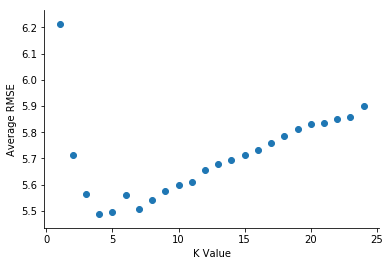

In [19]:
# enter your code here
# enter your code here
features = ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
rmses = []
for K in np.arange(24)+1:
    rmse = K_fold(boston_df, Kfolds, features, L, K)
    rmses.append(rmse)
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x = np.arange(24)+1
y = rmses
ax.scatter(x, y)
plt.xlabel('K Value')
plt.ylabel('Average RMSE')
plt.show()

From the output, we could find K=4 will be the optimal K-value for this model. 